In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from astropy.table import Table, vstack
import GCRCatalogs
from GCRCatalogs.helpers.tract_catalogs import tract_filter, sample_filter
from GCRCatalogs import GCRQuery
import pandas as pd

In [35]:
cat_names = ['9943_map_associations', '9942_map_associations', '9816_map_associations', '9815_map_associations', '9814_map_associations', '9687_map_associations', '9686_map_associations',
             '9559_map_associations', '10450_map_associations', '10327_map_associations', '10326_map_associations', '10200_map_associations', '10199_map_associations',
             '10198_map_associations', '10072_map_associations', '10071_map_associations']
tile_names = []
for i in range(len(cat_names)):
    tile_names.append(cat_names[i].split("_")[0])

In [36]:
inpath = '/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/amico/map_detections_refined_noBuffer_all.fits'
amico_cl_data = Table.read(inpath)['ID', 'Xphys', 'Yphys', 'Zphys','LAMBSTAR', 'SN_NO_CLUSTER', 'SN', 'uid', 'tile']

In [9]:
amico_cl_data

ID,Xphys,Yphys,Zphys,LAMBSTAR,SN_NO_CLUSTER,SN,UID,TILE
int16,float64,float64,float32,float64,float64,float64,int16,int16
2,61.379151,-39.997938,0.76,151.05119,87.011334,10.992644,1,10070
4,61.751903,-39.598934,0.39,34.635494,45.503782,8.6246391,2,10070
7,62.020461,-40.78391,0.76,65.485061,47.128286,8.0360327,3,10070
10,62.622221,-40.86162,0.26,35.691697,30.95731,7.1248405,4,10070
11,61.527245,-40.393481,0.74,49.109488,35.746636,7.0846547,5,10070
13,62.669286,-39.811269,0.38,22.831824,26.760903,6.6516001,6,10070
16,61.321316,-40.68769,1.33,40.708297,41.626933,6.4476733,7,10070
18,61.378259,-41.012951,0.44,26.0136,33.226036,6.4235022,8,10070
19,61.503286,-41.168414,0.38,24.052439,24.999905,6.4150788,9,10070


In [44]:
tile_names = [9942,9686,9559,9687,9815,9814,10071,9816,9943]

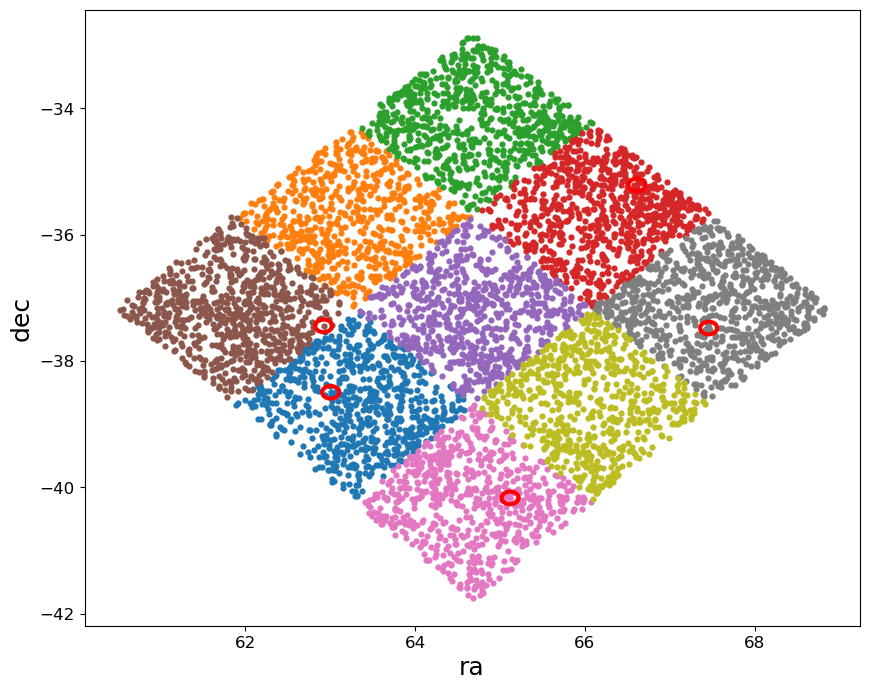

In [55]:
figure, axes = plt.subplots(figsize = (10,8))      
for i, tile in enumerate(tile_names):
    amico_data_detec_tile = amico_cl_data[amico_cl_data['tile']==int(tile)]
    ra = amico_data_detec_tile['Xphys']
    dec = amico_data_detec_tile['Yphys']
    axes.scatter(ra, dec, s = 12)
    amico_cdt = amico_data_detec_tile[(amico_data_detec_tile['ID']==101)]
    if len(amico_cdt)!=0:
        circle = plt.Circle((amico_cdt['Xphys'],amico_cdt['Yphys']),.1, color = 'red', fill = False, linewidth = 3)
        axes.add_artist( circle )
axes.set_xlabel('ra', fontsize = 18)
axes.set_ylabel('dec', fontsize = 18)
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
#axes.set_xticks(fontsize=20,)
plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/rds/small_map.png')

In [ ]:
amico_cdt

In [20]:
 amico_cl_data[(amico_cl_data['tile']==9559)]

ID,Xphys,Yphys,Zphys,LAMBSTAR,SN_NO_CLUSTER,SN,uid,tile
int16,float64,float64,float64,float64,float64,float64,int16,int16
1,64.257378,-34.475754,0.31999999,94.065369,44.554123,8.7294683,5736,9559
2,64.140701,-34.695297,0.56,60.671577,45.688927,7.7550945,5737,9559
4,63.753197,-34.542969,0.39999998,55.492702,44.124405,7.5915031,5738,9559
5,65.060272,-34.990952,0.30999997,46.030697,30.24468,7.1570339,5739,9559
9,65.030769,-33.751022,0.37999997,34.446854,32.687096,6.7403917,5740,9559
11,65.112518,-34.465778,0.34999996,59.311626,29.179428,6.7141566,5741,9559
13,65.386917,-34.644531,0.44999999,32.057762,34.754093,6.6083479,5742,9559
14,63.940521,-34.639248,0.42999998,48.538036,33.489655,6.3732343,5743,9559
15,64.778259,-33.801468,0.37999997,26.622044,28.817041,6.3108106,5744,9559


In [22]:
amico_cl_data[(amico_cl_data['ID']==101)]

ID,Xphys,Yphys,Zphys,LAMBSTAR,SN_NO_CLUSTER,SN,uid,tile
int16,float64,float64,float64,float64,float64,float64,int16,int16
101,65.119835,-40.164696,1.02,25.091158,19.922134,4.7009764,697,10071
101,64.309631,-41.532894,0.60999995,15.489766,14.21274,4.4554496,1959,10198
101,66.651924,-42.711174,0.85999995,24.234722,15.937883,4.6884274,2526,10199
101,65.982376,-43.600117,0.67999995,18.689486,14.611876,4.4617124,3851,10326
101,66.614159,-35.211372,1.02,22.001989,20.581415,4.7823944,7152,9687
101,62.923534,-37.441898,0.84999996,19.819111,16.450939,4.718286,7953,9814
101,67.459045,-37.476498,0.85999995,22.036522,15.349977,4.5935378,9398,9816
101,63.006294,-38.494175,0.54999995,17.130785,19.101202,4.9092069,10171,9942


In [31]:
circle = plt.Circle((amico_cdt['Xphys'],amico_cdt['Yphys']),10, color = 'red', fill = True)

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

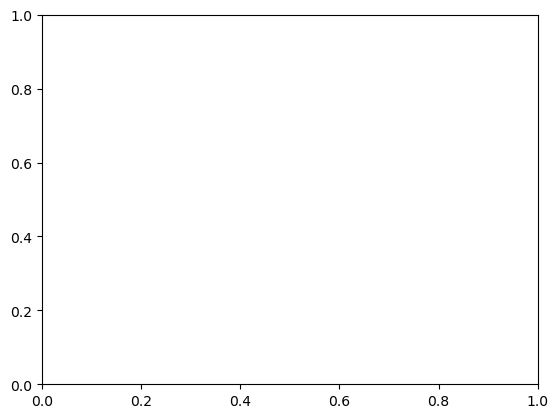